In [1]:
!pip3 install nltk
!pip3 install Sastrawi
!pip3 install nlp_id

In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nlp_id.lemmatizer import Lemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.neural_network import MLPClassifier
import re
alay_dict=pd.read_csv("/content/drive/MyDrive/Program Platinum Challange/DATA/new_kamusalay.csv",encoding='latin1',header=None)
alay_dict=alay_dict.rename(columns={0:'Original',1:'Baku'})

kasar_dict=pd.read_csv("/content/drive/MyDrive/Program Platinum Challange/DATA/abusive.csv",encoding='latin1')
kasar_dict['Kata_Sensor']="a1b2c3d4e5f6" #Inisiasi kata ganti untuk kata-kata yang kasar dengan kata "disensor"

print(kasar_dict)

alay_dict_map = dict(zip(alay_dict['Original'], alay_dict['Baku']))
kasar_dict_map = dict(zip(kasar_dict['ABUSIVE'],kasar_dict['Kata_Sensor']))

def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])


def sensor_kata_kasar(text):
    return ' '.join([kasar_dict_map[word] if word in kasar_dict_map else word for word in text.split(' ')])


def preprocess(TextYangInginDiPreProcess):
    #Tahap Pertama Adalah Membuat semua huruf menjadi huruf kecil atau lower
    text = TextYangInginDiPreProcess.lower()

    #Tahap Kedua adalah menghilangkan non alpha numeric character pada text
    text = re.sub('[^0-9a-zA-Z]+',' ',text)

    #Tahap Ketiga adalah menghilangkan char tidak penting
    text=re.sub('\n',' ',text) #Menghilangkan new line pada data
    text=re.sub('rt',' ',text) #Menghilangkan kata-kata retweet
    text=re.sub('user',' ',text) #Menghilangkan kata-kata user
    text=re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) #Menghilangkan  URL
    text=re.sub(' +',' ',text) #Menghilangkan ekstra spasi

    #Tahap keempat adalah membuat map terhadap kata-kata "alay" dan mengubah nya menjadi kata yang baku
    text=normalize_alay(text)

    #Tahap kelima adalah mensensor kata kasar dengan kata "disensor"
    text=sensor_kata_kasar(text)
    return text

def menghilangkan_kata_umum_dengan_stopword(text):
    # Mengambil daftar stopwords bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Menghapus stopwords dari teks
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Menggabungkan kata-kata yang tersisa menjadi teks tanpa stopwords
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def mengurangi_variasi_kata_dengan_steeming(teks):
    Stemming = StemmerFactory()
    Fact = Stemming.create_stemmer()
    teks = Fact.stem(teks)
    return teks

def preprocess_semua_kata(teks):
    teks = preprocess(teks)
    teks = menghilangkan_kata_umum_dengan_stopword(teks)
    teks = mengurangi_variasi_kata_dengan_steeming(teks)
    return teks

         ABUSIVE   Kata_Sensor
0           alay  a1b2c3d4e5f6
1          ampas  a1b2c3d4e5f6
2           buta  a1b2c3d4e5f6
3        keparat  a1b2c3d4e5f6
4         anjing  a1b2c3d4e5f6
..           ...           ...
120        rezim  a1b2c3d4e5f6
121        sange  a1b2c3d4e5f6
122       serbet  a1b2c3d4e5f6
123        sipit  a1b2c3d4e5f6
124  transgender  a1b2c3d4e5f6

[125 rows x 2 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_latih_df = pd.read_csv("/content/drive/MyDrive/Program Platinum Challange/Data_Yang_Telah_Di_Preprocess.csv")
data_latih_df

,Unnamed: 0,tweet,sentiment
0,0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,1,lokasi strategis jalan sumatra bandung nya nya...,positive
2,2,betapa bahagia nya unboxing paket barang nya b...,positive
3,3,makan agam harga makan food stall 10 kasir sua...,positive
4,4,unik bagus foto makan enak pegawai ramah bersi...,positive
...,...,...,...
3439,3439,a1b2c3d4e5f6 anjing orang orang sarawak a1b2c3...,negative
3440,3440,iri fungsi sekolah ubah sepe i,negative
3441,3441,halo j triliun butuh tunggu 24 jam jaka a tar ...,negative
3442,3442,agama buddha sesat serah debat orang a1b2c3d4e...,negative


In [5]:
data_latih_df = data_latih_df.drop_duplicates()

In [6]:
data_latih_df = data_latih_df.dropna()

In [7]:
kateg = pd.get_dummies(data_latih_df['sentiment'])

In [8]:
new_df = pd.concat([data_latih_df['tweet'],kateg],axis=1)
new_df

,tweet,negative,neutral,positive
0,warung milik usaha pabrik puluh kenal putih ba...,0,0,1
1,lokasi strategis jalan sumatra bandung nya nya...,0,0,1
2,betapa bahagia nya unboxing paket barang nya b...,0,0,1
3,makan agam harga makan food stall 10 kasir sua...,0,0,1
4,unik bagus foto makan enak pegawai ramah bersi...,0,0,1
...,...,...,...,...
3439,a1b2c3d4e5f6 anjing orang orang sarawak a1b2c3...,1,0,0
3440,iri fungsi sekolah ubah sepe i,1,0,0
3441,halo j triliun butuh tunggu 24 jam jaka a tar ...,1,0,0
3442,agama buddha sesat serah debat orang a1b2c3d4e...,1,0,0


In [9]:
new_df.isna().sum()

tweet       0
negative    0
neutral     0
positive    0
dtype: int64

In [10]:
X = new_df['tweet']
Y = new_df[['negative','neutral','positive']]

In [11]:
"""
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=.8)
"""

max_features = 100000
def tokenisasi_kata(kata,max_features=max_features):
  tokenizer = Tokenizer(num_words=max_features,split=' ',lower=None)
  tokenizer.fit_on_texts(kata)
  kata_token = tokenizer.texts_to_sequences(kata)
  pad_kata = pad_sequences(kata_token)
  return pad_kata,tokenizer.word_index

X_tok,tok = tokenisasi_kata(X)
vocab_size = len(tok)
maxlen = max(len(i) for i in X_tok)

"""
X_train = tokenisasi_kata(X_train)
X_test = tokenisasi_kata(X_test)

#max_features = 100000
#tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
#tokenizer.fit_on_texts(new_df['tweet'])
X_train
"""

"\nX_train = tokenisasi_kata(X_train)\nX_test = tokenisasi_kata(X_test)\n\n#max_features = 100000\n#tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)\n#tokenizer.fit_on_texts(new_df['tweet'])\nX_train\n"

In [12]:
vocab_size

7248

In [13]:
maxlen

55

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_tok,Y,train_size=.8)

In [15]:
X_tok
print(len(tok))

7248


In [16]:
embed_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features,embed_dim,input_length=X_tok.shape[1]),
    tf.keras.layers.LSTM(64,dropout=0.3),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [17]:
import numpy as np
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if((logs.get('accuracy')>0.80) and (logs.get('val_accuracy')>0.80)):
      a = logs.get('accuracy')
      b = logs.get('val_accuracy')
      if (np.abs(a-b))<0.1:
        self.model.stop_training = True

In [18]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, epochs=10,validation_data=(X_test, Y_test),verbose=1,callbacks = myCallback())

Epoch 1/10
87/87 [==============================] - 61s 669ms/step - loss: 0.8238 - accuracy: 0.6409 - val_loss: 0.6038 - val_accuracy: 0.7634
Epoch 2/10
87/87 [==============================] - 29s 338ms/step - loss: 0.3870 - accuracy: 0.8660 - val_loss: 0.4868 - val_accuracy: 0.8128


In [20]:
model.save("/content/drive/MyDrive/Program Platinum Challange/model_dl_yang_telah_dilatih.h5")

In [21]:
import matplotlib.pyplot as plt

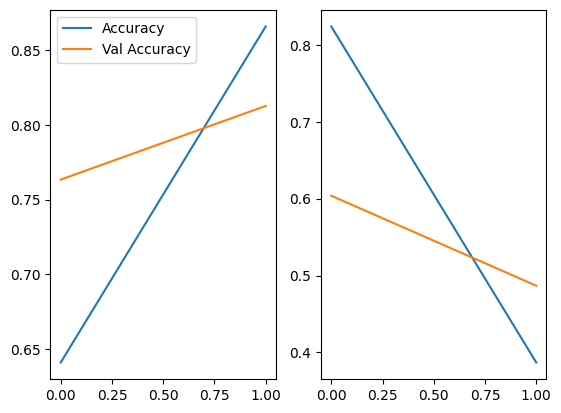

In [22]:
plt.figure(1)
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val Accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [23]:
def lakukan_prediksi(teks):
  sentiment = ['negative','neutral','positive']
  max_features = 100000
  teks = preprocess_semua_kata(teks)
  tokenizer = Tokenizer(num_words=max_features,split=' ',lower=None)
  tokenizer.fit_on_texts(teks)
  kata_token = tokenizer.texts_to_sequences(teks)
  pad_kata = pad_sequences(kata_token)
  prediksi = model.predict(pad_kata)
  polarity = np.argmax(prediksi[0])
  return sentiment[polarity]

In [24]:
lakukan_prediksi("dasar anak anjing")

1/1 [==============================] - 0s 488ms/step


'negative'

In [25]:
data_uji_model = pd.read_csv("/content/drive/MyDrive/Program Platinum Challange/Data_Testing_Yang_Telah_Di_Preprocess.csv")

In [26]:
data_uji_model = data_uji_model.drop_duplicates()
data_uji_model = data_uji_model.dropna()

In [27]:
data_uji_model

,Unnamed: 0,Tweet
0,0,cowok usaha lacak perhati gue lantas remeh per...
1,1,telat tau a1b2c3d4e5f6 a1b2c3d4e5f6 gue gaul c...
2,2,41 kadang pikir percaya tuhan jatuh kali kali ...
3,3,ku tau mata a1b2c3d4e5f6
4,4,kaum a1b2c3d4e5f6 a1b2c3d4e5f6 dongok a1b2c3d4...
...,...,...
13164,13164,bicara ndasmu a1b2c3d4e5f6 sekata a1b2c3d4e5f6
13165,13165,kasur enak a1b2c3d4e5f6
13166,13166,hati hati a1b2c3d4e5f6 bosan duh xf0 x9f x98 xaa
13167,13167,bom real mudah deteksi bom kubur dahsyat ledak...


In [28]:
def lakukan_sentimen_terhadap_data_uji(teks):
  sentiment = ['negative','neutral','positive']
  max_features = 100000
  tokenizer = Tokenizer(num_words=max_features,split=' ',lower=None)
  tokenizer.fit_on_texts(teks)
  kata_token = tokenizer.texts_to_sequences(teks)
  pad_kata = pad_sequences(kata_token)
  prediksi = model.predict(pad_kata)
  polarity = np.argmax(prediksi[0])
  return sentiment[polarity]

In [29]:
data_coba_coba = data_uji_model[:50]

In [30]:
data_coba_coba['Sentimen'] = data_coba_coba['Tweet'].apply(lakukan_sentimen_terhadap_data_uji)

2/2 [==============================] - 0s 8ms/step


<ipython-input-30-25fd29b63db6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coba_coba['Sentimen'] = data_coba_coba['Tweet'].apply(lakukan_sentimen_terhadap_data_uji)


In [31]:
data_coba_coba

,Unnamed: 0,Tweet,Sentimen
0,0,cowok usaha lacak perhati gue lantas remeh per...,negative
1,1,telat tau a1b2c3d4e5f6 a1b2c3d4e5f6 gue gaul c...,negative
2,2,41 kadang pikir percaya tuhan jatuh kali kali ...,positive
3,3,ku tau mata a1b2c3d4e5f6,positive
4,4,kaum a1b2c3d4e5f6 a1b2c3d4e5f6 dongok a1b2c3d4...,negative
5,5,ya a1b2c3d4e5f6 a1b2c3d4e5f6 kawan kawan xf0 x...,negative
6,6,deklarasi pilih kepala daerah 2018 aman anti h...,positive
7,7,gue selesai re watch aldnoah zero a1b2c3d4e5f6...,negative
8,8,admin belanja po baik nak makan ais kepal milo...,negative
9,9,enak a1b2c3d4e5f6,negative


In [37]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions

matrix_test = metrics.classification_report(Y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))
print(matrix_test)

22/22 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       238
           1       0.80      0.86      0.83       225
           2       0.89      0.79      0.84       226

    accuracy                           0.81       689
   macro avg       0.82      0.81      0.81       689
weighted avg       0.82      0.81      0.81       689

